In [ ]:
from annotator import Annotator
from graph_edit_distance import Label_Metrics
import graphs as gr
import networkx as nx
import numpy as np
import pandas as pd

annotator1 = Annotator('annotator1', "annotations-TBikaun.json")
annotator2 = Annotator('annotator2', "annotations-ziyu.zhao.json")
annotator3 = Annotator('annotator3', "annotations-danielsantosa.json")
annotator4 = Annotator('annotator4', "annotations-mhodki.json")
annotator5 = Annotator('annotator5', "annotations-mstewartuwa.json")
annotator6 = Annotator('annotator6', "annotations-caitlinwoods.json")
annotator7 = Annotator('annotator7', "annotations-Tim.json")
label = Label_Metrics(annotator1, annotator2, annotator3)
overall_table = label.get_accumulated_table()

In [ ]:
def calculate_percentage_same_0_to_1(overall_table):
    percentage_data = {}
    for i in range(0, 101, 10):
        percentage_same = i / 100
        result_df = label.create_df_same_different(percentage_same, overall_table)
        # pd.set_option('display.max_rows', None)
        pivoted_table = label.pivot_dataframe(result_df)
        annotator_nodes = set(pivoted_table['annotator_id'])
        annotator_graphs = Label_Metrics.create_annotator_graphs(pivoted_table, annotator_nodes)
        pairwise_ged = Label_Metrics.calculate_pairwise_ged(annotator_graphs, annotator_nodes)
        # print("Graph Edit Distance between annotators:")
        # print(pairwise_ged)
        pairwise_reliability = Label_Metrics.calculate_pairwise_reliability(pairwise_ged, annotator_graphs)
        # print("Pairwise Reliability:")
        # print(pairwise_reliability)
        overall_reliability = Label_Metrics.calculate_overall_reliability(pairwise_reliability)
        percentage_data[percentage_same*100] = overall_reliability
    return percentage_data

In [1]:
coefficients_0_to_1 = {0.0: {'Overall Reliability': -0.05052451406834457},
 10.0: {'Overall Reliability': 0.024745490434397555},
 20.0: {'Overall Reliability': 0.19381732403871832},
 30.0: {'Overall Reliability': 0.3154041896147159},
 40.0: {'Overall Reliability': 0.40339356965982454},
 50.0: {'Overall Reliability': 0.49705972950211913},
 60.0: {'Overall Reliability': 0.5961789116929911},
 70.0: {'Overall Reliability': 0.6994726965281738},
 80.0: {'Overall Reliability': 0.8064437609729073},
 90.0: {'Overall Reliability': 0.8891880171189639},
 100.0: {'Overall Reliability': 1.0}}

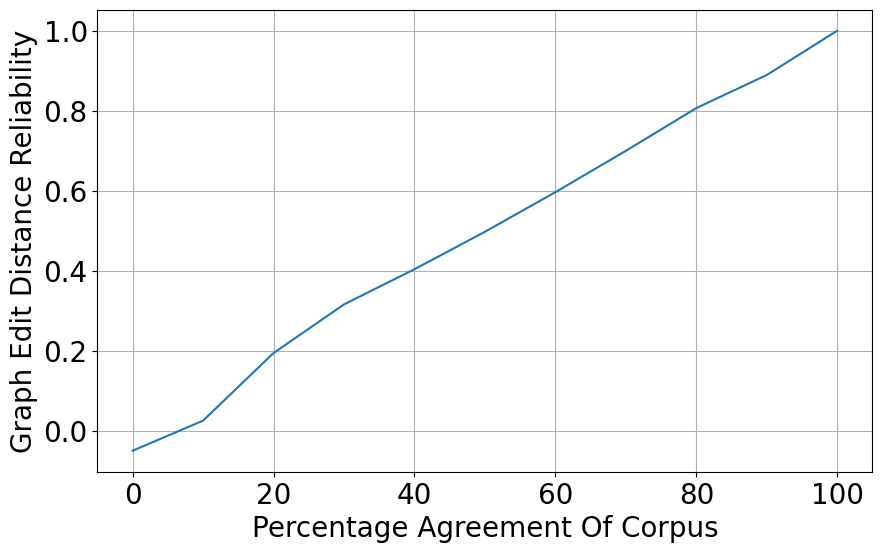

In [2]:
# coefficients_0_to_1 = calculate_percentage_same_0_to_1(overall_table)
import graphs as gr
gr.plot_edit_distance_agreements(coefficients_0_to_1, title='', x_axis_title='Percentage Agreement Of Corpus', y_axis_title='Graph Edit Distance Reliability')